<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2 = y^Ty−y^Txw−(xw)^Ty+(xw)^T(xw)+\lambda w^2 $$
$$ => Q(w)=y^Ty−2y^Txw+w^Tx^Txw+λw^2$$
$$\nabla_w Q(w) = - 2x^Ty+2x^Txw + 2\lambda w $$
Приравняем производную к 0
$$w = \frac{x^Ty}{x^Tx + \lambda } $$
$$\nabla^2_w Q(w) = 2x^Tx + 2\lambda $$
Полученная матрица является суммой двух положительных матриц $\implies$ тоже положительна. При λ>0 матрица второй производной положительно-определенная. Следовательно, критическая точка является точкой минимума.

Подставим в формулу шага градиентного спуска
$$w_{k+1} = w_{k} - \alpha \nabla_w Q(w_{k}) $$

$$= w_{k} - 2\alpha (w_{k}(x^Tx+ \lambda)-x^Ty ) $$




## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны (видно из графиков). Ответьте на вопросы:
    - Чему равны значения экстремумов? см вывод
    - При старте из какой начальной точки найденные экстремумы совпадут? 0

In [23]:
import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x0 = 0
min: x = 0.0000, f(x) = 0.0000
max: x = 0.0000, f(x) = 0.0000



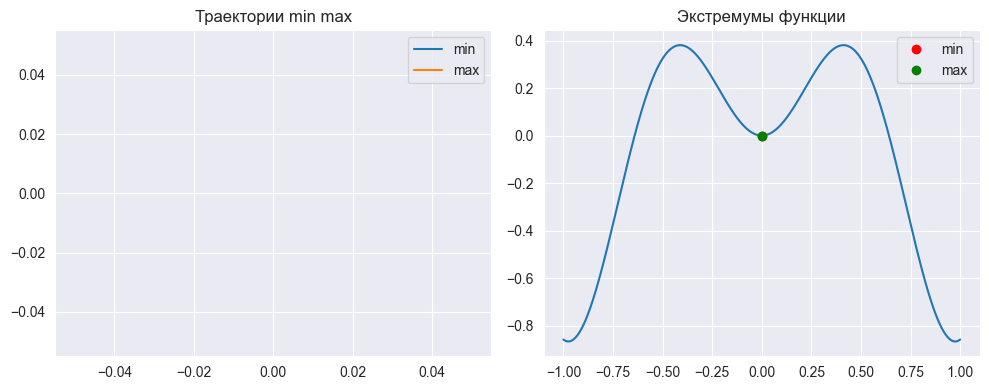

x0 = 0.5
min: x = 0.9751, f(x) = -0.8671
max: x = 0.4119, f(x) = 0.3807



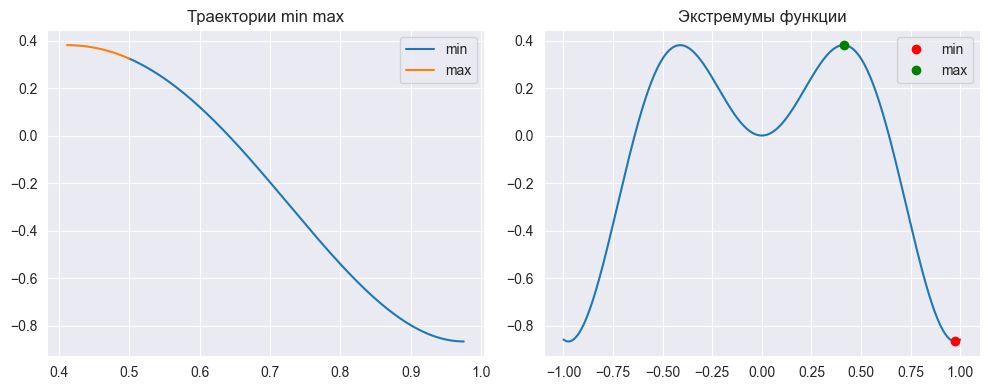

x0 = 1
min: x = 0.9751, f(x) = -0.8671
max: x = 1.6035, f(x) = 1.8392



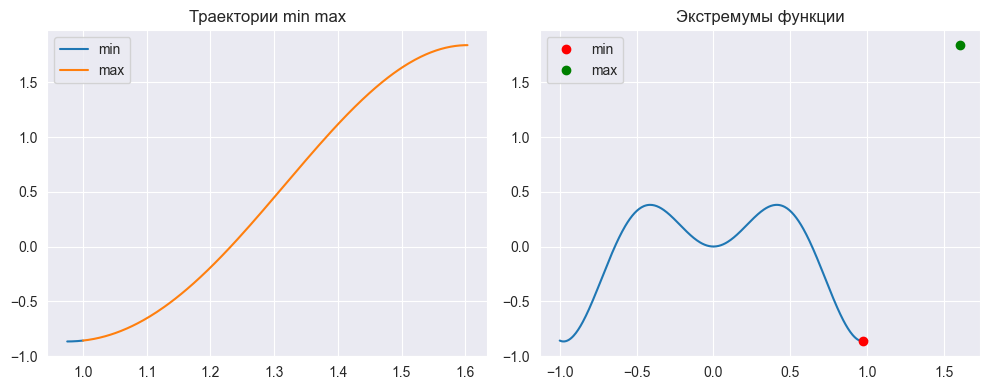

In [9]:
# Функция и её производная
def f(x):
    return x * np.sin(5 * x) + 0.1 * x ** 2


def df(x):
    return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x


# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    trace = [x]
    for _ in range(max_iter):
        x_next = x - eta * df(x)
        trace.append(x_next)
        if abs(x_next - x) < tol:
            break
        x = x_next
    return x, trace


# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
    min_x, min_path = gradient_descent(f, df, x0, eta, max_iter, tol)
    max_x, max_path = gradient_descent(lambda x: -f(x), lambda x: -df(x), x0, eta, max_iter, tol)
    return min_x, max_x, min_path, max_path


x0_values = [0, 0.5, 1]
eta = 0.001

for x0 in x0_values:
    min_x, max_x, min_path, max_path = find_points(f, df, x0, eta)
    print(f"x0 = {x0}")
    print(f"min: x = {min_x:.4f}, f(x) = {f(min_x):.4f}")
    print(f"max: x = {max_x:.4f}, f(x) = {f(max_x):.4f}")
    print()

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)

    plt.plot(min_path, [f(x) for x in min_path], label='min')
    plt.plot(max_path, [f(x) for x in max_path], label='max')

    plt.legend()
    plt.title("Траектории min max")
    plt.subplot(1, 2, 2)
    x_values = np.linspace(-1, 1, 400)
    plt.plot(x_values, [f(x) for x in x_values])

    plt.plot(min_x, f(min_x), 'ro', label='min')
    plt.plot(max_x, f(max_x), 'go', label='max')
    plt.legend()
    plt.title("Экстремумы функции")
    plt.tight_layout()
    plt.show()


## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [ ]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    return weights

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [60]:

def compute_cost(X, y, theta):
    m = len(y)
    cost = (1. / m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost


def compute_cost_sgd(X, y, theta):
    m = len(y)
    cost = (1. / m) * np.sum(np.square(X @ theta - y))
    return cost


def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    theta = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros(num_iterations)

    for i in range(num_iterations):
        rand_index = np.random.randint(0, m)
        X_i = X[rand_index, :].reshape(1, -1)
        y_i = y[rand_index].reshape(-1)
        grad = X_i.T @ (X_i @ theta - y_i)
        theta -= learning_rate * grad.flatten()
        cost_track[i] = compute_cost_sgd(X, y, theta)
    return cost_track, theta


## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [32]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,  #number of samples
                          n_features=10,  #number of features
                          n_informative=8,  #number of useful features
                          noise=100,  #bias and standard deviation of the guassian noise
                          coef=True,  #true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random() * 0.01

NE time: 0.016414880752563477
NE R2: 0.7552706300497973
GD time: 8.11463713645935
GD R2: 0.7554626185750483
SGD time: 3.3688018321990967
SGD R2: 0.7488946485817249


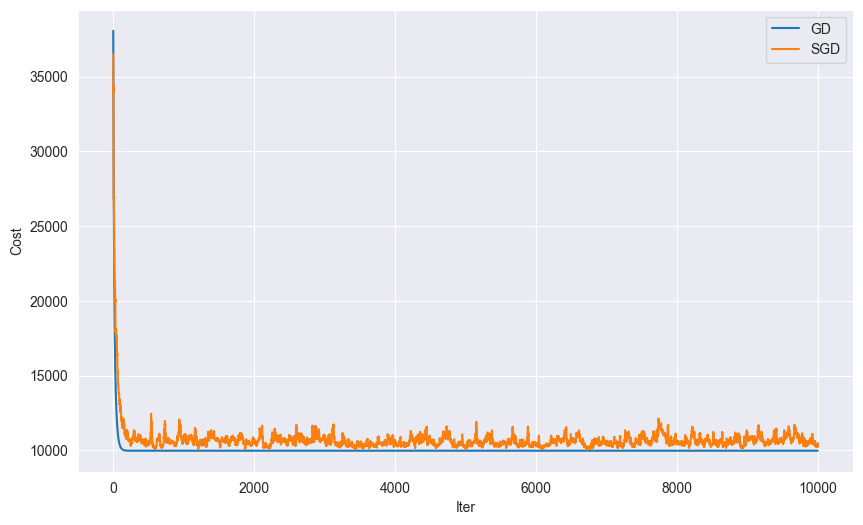

In [61]:

def normal_equation(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y


def gradient_descent_from_book(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        params = params - 2. / m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params


def predict(X, params):
    X_new = np.hstack((np.ones((X.shape[0], 1)), X))
    return X_new @ params


iterations = 10000
learning_rate = 0.01

start = time.time()
params_ne = normal_equation(X, y)
end = time.time()
print(f"NE time: {end - start}")
y_pred_ne = predict(X, params_ne)
print(f'NE R2: {r2_score(y, y_pred_ne)}')

start = time.time()
cost_track_gd, params_gd = gradient_descent_from_book(X, y, learning_rate, iterations)
end = time.time()
print(f"GD time: {end - start}")
y_pred_gd = predict(X, params_gd)
print(f'GD R2: {r2_score(y, y_pred_gd)}')

start = time.time()
cost_track_sgd, params_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)
end = time.time()
print(f"SGD time: {end - start}")
y_pred_sgd = predict(X, params_sgd)
print(f'SGD R2: {r2_score(y, y_pred_sgd)}')

plt.figure(figsize=(10, 6))
plt.plot(cost_track_gd, label='GD')
plt.plot(cost_track_sgd, label='SGD')
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.legend()
plt.show()





все методы справились с задачей, но с разной эффективностью:

- NE: R2 = 0.7553
- GD: R2 = 0.7555
- SGD: R2 = 0.7489

SGD чуть хуже остальных, так как он использует случайные подвыборки данных и может не достигать точного минимума, зато работает он быстрее GD

- NE: 0.011 сек самый быстрый
- SGD: 3.68 сек
- GD: 7.16 сек

NE быстрее, так как это прямой аналитический метод, не требующий итераций. GD медленный,  так как на каждой итерации проходит все данные. SGD быстрее GD, так как использует только одно наблюдение на каждой итерации.

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

При слишком большом коэф модель недообучится из слишком большого штрафа, при маленьком - переобучится. С полученным коэф. 0.01 достигается баланс между точностью и штрафом.

In [83]:
def compute_cost_sgd_reg(X, y, theta, lambda_reg):
    m = len(y)
    cost = (1. / m) * np.sum(np.square(X @ theta - y)) + (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost


def stochastic_gradient_descent_reg(X, y, learning_rate, num_iterations, lambda_reg):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    theta = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros(num_iterations)

    for i in range(num_iterations):
        rand_index = np.random.randint(0, m)
        X_i = X[rand_index, :].reshape(1, -1)
        y_i = y[rand_index].reshape(-1)

        grad = X_i.T @ (X_i @ theta - y_i) + (lambda_reg / m) * theta
        grad[0] -= (lambda_reg / m) * theta[0]  # no reg for theta_0

        theta -= learning_rate * grad.flatten()
        cost_track[i] = compute_cost_sgd_reg(X, y, theta, lambda_reg)

    return cost_track, theta


lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
r2_scores = []

for lambda_reg in lambda_values:
    cost_history, params_sgd_l2 = stochastic_gradient_descent_reg(X, y,
                                                                  learning_rate=0.01,
                                                                  num_iterations=1000,
                                                                  lambda_reg=lambda_reg)

    y_pred_sgd_l2 = predict(X, params_sgd_l2)
    r2 = r2_score(y, y_pred_sgd_l2)
    r2_scores.append(r2)
    print(f"Lambda: {lambda_reg:.3f}, R2 score: {r2}")

best_lambda = lambda_values[np.argmax(r2_scores)]
print(f"\nbest lambda {best_lambda:.3f}")
print(f"best R2 score: {max(r2_scores):.5f}")

Lambda: 0.001, R2 score: 0.7144694151025601
Lambda: 0.010, R2 score: 0.7493586032295754
Lambda: 0.100, R2 score: 0.7463293084538006
Lambda: 1.000, R2 score: 0.7405002404732255
Lambda: 10.000, R2 score: 0.7373041124383746
Lambda: 100.000, R2 score: 0.7319166379240296

best lambda 0.010
best R2 score: 0.74936


## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

Lambda: 0.001, R2 score: 0.7426512112813852


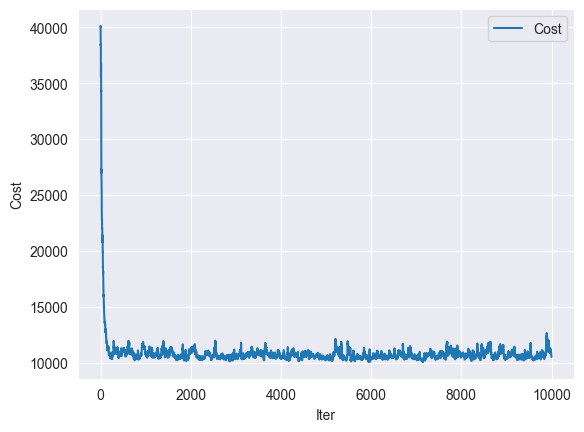

Lambda: 0.010, R2 score: 0.7294809801047641


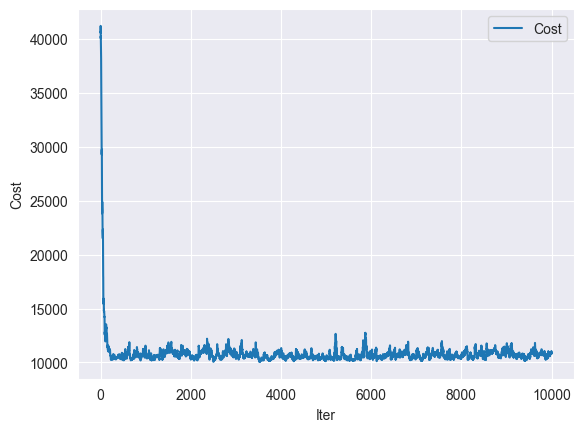

Lambda: 0.100, R2 score: 0.7289433680981963


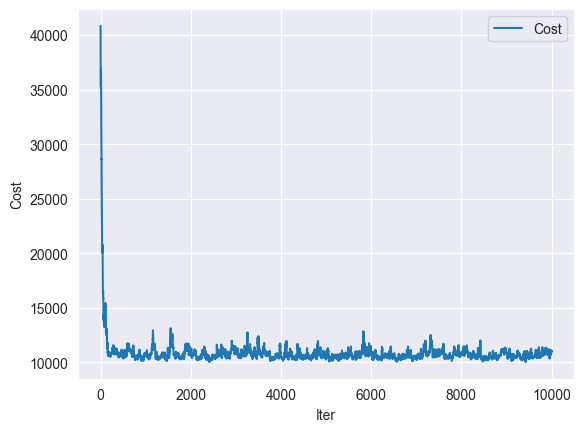

Lambda: 1.000, R2 score: -5.993670371405276e+253


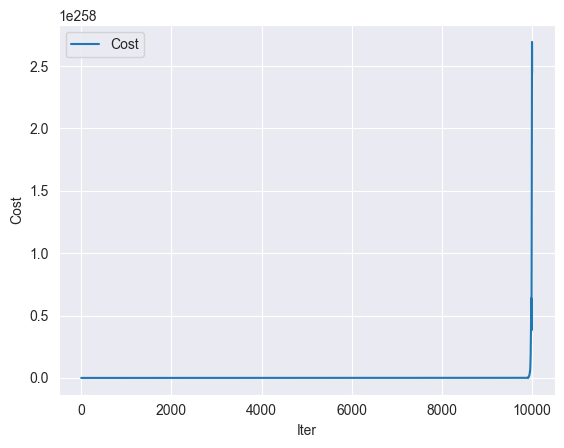


best momentum 0.001
best R2 score: 0.74265


In [87]:
def modified_grad_descent(X, y, learning_rate, iterations, momentum):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    theta = np.random.rand(X.shape[1])
    velocity = np.zeros(X.shape[1])
    m = X.shape[0]
    cost_history = []

    for i in range(iterations):
        rand_index = np.random.randint(0, m)
        X_i = X[rand_index, :].reshape(1, -1)
        y_i = y[rand_index]

        grad = X_i.T @ (X_i @ theta - y_i)

        velocity = momentum * velocity - learning_rate * grad
        theta += velocity

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return  cost_history, theta


momentum_values = [0.001, 0.01, 0.1, 1,]
r2_scores = []

for mom in momentum_values:
    cost_history, params_sgd_l2 = modified_grad_descent(
        X, y,  learning_rate, iterations, momentum=mom)

    y_pred_sgd_l2 = predict(X, params_sgd_l2)
    r2 = r2_score(y, y_pred_sgd_l2)
    r2_scores.append(r2)
    print(f"Lambda: {mom:.3f}, R2 score: {r2}")


    plt.plot(cost_history, label='Cost')
    plt.xlabel('Iter')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

# Находим наилучшее значение lambda
best_m = momentum_values[np.argmax(r2_scores)]
print(f"\nbest momentum {best_m:.3f}")
print(f"best R2 score: {max(r2_scores):.5f}")

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

для метода Ньютона требуется вычисление гессиана , что очень затратно, особенно для больших сетей со множеством параметров. Да и сам гессианы бывают плохо обусловленными. В стохастическом варианте вообще получается скорее всего много нерелевантного шума. Так что обходятся оптимизаторами с производными первого порядка, они более экономичны в ресурсах.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

In [ ]:
Сабрина